In [6]:
%run -i CouplingsModel_1.py
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
direc = '/home/as974/ada'
#direc = '/Users/adashaw/Dropbox (Harvard University)/Debbie-Ada'

def scale_01(a):
    print('scale01\nrange of the weights:',np.ptp(a))
    return (a - np.min(a))/np.ptp(a)
def plot_top_n(z,n,mod = 'corrected'):
    z[z<np.sort(z.flatten())[::-1][n-1]] = 0
    zscal = scale_01(z)
    if mod == 'corrected':
        zscal[np.tril_indices(len(zscal))] = 0
        for r in range(len(z)):
            for c in range(len(z)):
                plt.scatter(r,c,s=zscal[r,c]*100,c='g')
    else:
        zscal[np.triu_indices(len(zscal))] = 0
        for r in range(len(z)):
            for c in range(len(z)):
                plt.scatter(r,c,s=zscal[r,c]*100,c='r')
    plt.axis('square')
    plt.axis([-1,len(zscal),-1,len(zscal)])
    plt.gca().invert_xaxis()


def plot_top_n_contacts(file, mod = 'cor'):
    df = read_raw_ec_file(file)
    df['cn_scaled'] = scale_01(df.cn)
    for index,row in df.nlargest(100,'cn').iterrows():
        if abs(row.i-row.j)>1:
            if mod == 'cor':
                plt.scatter(row.i,row.j,s=row.cn_scaled*50,c='g')
            else:
                plt.scatter(row.j,row.i,s=row.cn_scaled*50,c='r')
    plt.axis('square')

In [11]:
correctedModel = CouplingsModel_1(direc+'/repeatsProject/PvLEA4_full_b0.35/cOutput/PvLEA4_dupRM_cor.model')
uncorrectedModel = CouplingsModel_1(direc+'/repeatsProject/PvLEA4_full_b0.35/cOutput/PvLEA4_uncor.model')

scale01
range of the weights: 0.054850197765670794
scale01
range of the weights: 0.028509750608773227


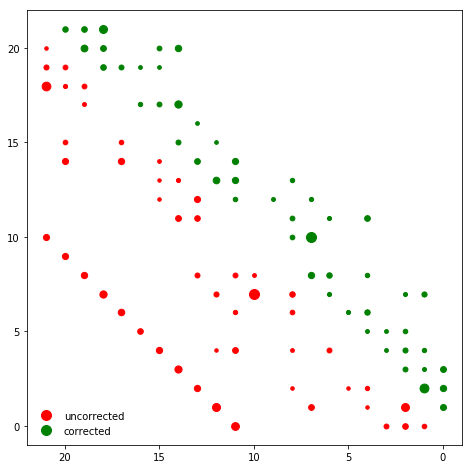

In [13]:
plt.figure(figsize=[8,8])
plot_top_n(uncorrectedModel.cn_scores,100,mod='uncorrected')
plot_top_n(correctedModel.cn_scores,100)
red = mlines.Line2D([], [], color='r', marker='o', linestyle='None', markersize=10, label='uncorrected')
green = mlines.Line2D([], [], color='g', marker='o', linestyle='None', markersize=10, label='corrected')
plt.legend(handles=[red,green],loc='lower left',frameon=False)
plt.show()